Example taken from:
https://www.youtube.com/watch?v=zLuVrqlYKyg&index=1&list=PLHXZdjnADb1Q6ol2UEuPMnXpQY-KzCmBy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Construct toy problem

In [19]:
nodelist = [0,1,2,3,4,5,6]
labels = {k:k for k in nodelist}  

In [20]:
def show_graph_with_labels(adjacency_matrix, labeldict):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=labeldict, with_labels=True)
    plt.show()

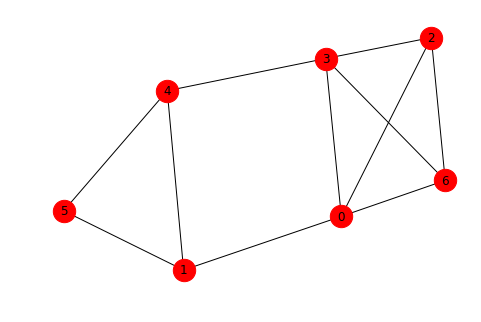

In [22]:
# Define the adjacency matrix A
A = np.array([[0,1,1,1,0,0,1],
              [1,0,0,0,1,1,0],
              [1,0,0,1,0,0,1],
              [1,0,1,0,1,0,1],
              [0,1,0,1,0,1,0],
              [0,1,0,0,1,0,0],
              [1,0,1,1,0,0,0]])

show_graph_with_labels(A,labels)

In [23]:
def check_symmetric(A, tol=1e-8):
    return np.allclose(A, A.T, atol=tol)

In [24]:
check_symmetric(A)

True

## Graph Laplacian

In [25]:
# Obtain the diagonal degree matrix D
D = np.zeros(A.shape)
for i in range(D.shape[0]):
    D[i][i] = sum(A[i])

print(D)

[[ 4.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.]]


In [26]:
# Compute the graph Laplacian
L = D - A
print(L)

[[ 4. -1. -1. -1.  0.  0. -1.]
 [-1.  3.  0.  0. -1. -1.  0.]
 [-1.  0.  3. -1.  0.  0. -1.]
 [-1.  0. -1.  4. -1.  0. -1.]
 [ 0. -1.  0. -1.  3. -1.  0.]
 [ 0. -1.  0.  0. -1.  2.  0.]
 [-1.  0. -1. -1.  0.  0.  3.]]


## Obtain the fielders vector

In [27]:
# Perform eigen-decomposition on the Laplacian
w, v = np.linalg.eig(L)

# Sort the eigenvalues in ascending order
idx = w.argsort()[::1]   
w = w[idx]
v = v[:,idx]

In [36]:
# The fielders vector is the eigenvector corresponding to the second smallest eigenvalue
# of the Laplacian L
fielders_eigenvalue = w[1]
fielders_vector = v[:,1]
print(fielders_eigenvalue)
print(fielders_vector)

0.885092458523
[ 0.22498923 -0.33137177  0.4036016   0.22498923 -0.33137177 -0.59443812
  0.4036016 ]


In [30]:
# Sort the fielders vector in ascending order
idx = fielders_vector.argsort()[::1]

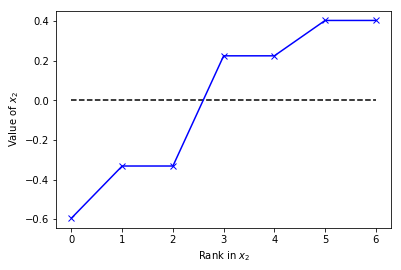

In [42]:
plt.plot(nodelist, fielders_vector[idx], '-bx')
plt.xlabel('Rank in $x_2$')
plt.ylabel('Value of $x_2$')
plt.hlines(0, min(nodelist), max(nodelist), linestyles='dashed')

In [35]:
# Notice that we can obtain the clustering by partitioning the indices 
# according to the fielder's vector
print(np.array(nodelist)[idx])
print(fielders_vector[idx])

[5 1 4 3 0 2 6]
[-0.59443812 -0.33137177 -0.33137177  0.22498923  0.22498923  0.4036016
  0.4036016 ]


In [ ]:
# We may infer the two clusters {1,4,5} and {0,2,3,6}